# 1.2 CoefficientFunctions

- **define** a `CoefficientFunction`
- **visualize**  a `CoefficientFunction`
- **evaluate** `CoefficientFunction`s at points
- print the **expression tree** of `CoefficientFunction`
- **integrate** a `CoefficientFunction`
- **differentiate** a `CoefficientFunction`
- include **parameter** in `CoefficientFunction`s
- **interpolate** a `CoefficientFunction` into a finite element space
- define **vector-valued** `CoefficientFunction`s 
- **compile** `CoefficientFunction`s

In [2]:
from ngsolve import *
from ngsolve.webgui import Draw
import matplotlib.pyplot as plt
mesh = Mesh(unit_square.GenerateMesh(maxh = 0.2))

## 1. define a CoefficientFunction

In [17]:
myfunc = x * (1-y)
myfunc

In [18]:
x

## 2. visualize a `CoefficientFunction`

In [19]:
Draw(myfunc, mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

## 3. evaluate `CoefficientFunction`s at points

In [23]:
mip = mesh(0.2, 0.5) # select point(0.2,0.5)
print(myfunc(mip)) # evaluate

0.1


In [30]:
points = [(0.1*i,0.2) for i in range(11)]
values = [myfunc(mesh(*p)) for p in points]
# print continous point on mesh
for p,v in zip(points, values):
    print(f'point=({p[0]:3.2f},{p[1]:3.2f}),value={v:6.5f}')

point=(0.00,0.20),value=0.00000
point=(0.10,0.20),value=0.08000
point=(0.20,0.20),value=0.16000
point=(0.30,0.20),value=0.24000
point=(0.40,0.20),value=0.32000
point=(0.50,0.20),value=0.40000
point=(0.60,0.20),value=0.48000
point=(0.70,0.20),value=0.56000
point=(0.80,0.20),value=0.64000
point=(0.90,0.20),value=0.72000
point=(1.00,0.20),value=0.80000


[[0.        ]
 [0.00808081]
 [0.01616162]
 [0.02424242]
 [0.03232323]
 [0.04040404]
 [0.04848485]
 [0.05656566]
 [0.06464646]
 [0.07272727]
 [0.08080808]
 [0.08888889]
 [0.0969697 ]
 [0.10505051]
 [0.11313131]
 [0.12121212]
 [0.12929293]
 [0.13737374]
 [0.14545455]
 [0.15353535]
 [0.16161616]
 [0.16969697]
 [0.17777778]
 [0.18585859]
 [0.19393939]
 [0.2020202 ]
 [0.21010101]
 [0.21818182]
 [0.22626263]
 [0.23434343]
 [0.24242424]
 [0.25050505]
 [0.25858586]
 [0.26666667]
 [0.27474747]
 [0.28282828]
 [0.29090909]
 [0.2989899 ]
 [0.30707071]
 [0.31515152]
 [0.32323232]
 [0.33131313]
 [0.33939394]
 [0.34747475]
 [0.35555556]
 [0.36363636]
 [0.37171717]
 [0.37979798]
 [0.38787879]
 [0.3959596 ]
 [0.4040404 ]
 [0.41212121]
 [0.42020202]
 [0.42828283]
 [0.43636364]
 [0.44444444]
 [0.45252525]
 [0.46060606]
 [0.46868687]
 [0.47676768]
 [0.48484848]
 [0.49292929]
 [0.5010101 ]
 [0.50909091]
 [0.51717172]
 [0.52525253]
 [0.53333333]
 [0.54141414]
 [0.54949495]
 [0.55757576]
 [0.56565657]
 [0.57

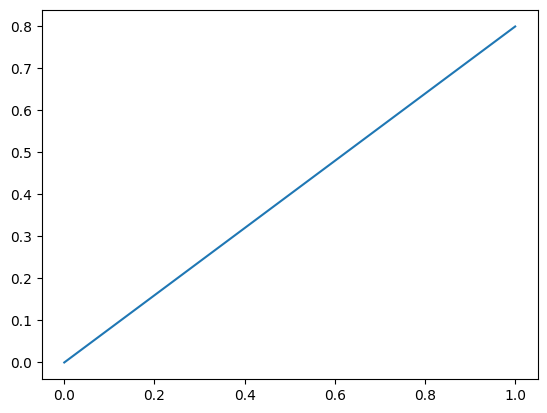

In [37]:
import numpy as np
X = np.linspace(0,1,num=100)
Y = np.ones_like(X) * 0.2
print(myfunc(mesh(X, Y))) # array

plt.plot(X, myfunc(mesh(X, Y)))
plt.show()

## 4. print the **expression tree** of `CoefficientFunction`

In [42]:
print(myfunc) # use tree structure to store CoefficientFunction

coef binary operation '*', real
  coef coordinate x, real
  coef binary operation '-', real
    coef 1, real
    coef coordinate y, real



## 5. integrate a `CoefficientFunction`

In [39]:
Integrate(myfunc, mesh, order = 5) # integrate function

0.24999999999999895

## 6. differentiate a `CoefficientFunction`

In [40]:
diff_func = myfunc.Diff(x)
Draw(diff_func, mesh, "derivative")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [41]:
print(diff_func)

coef binary operation '*', real
  coef binary operation '-', real
    coef 1, real
    coef coordinate y, real
  coef 1, real



## 6. parameter in `CoefficientFunction`s

In [45]:
k = Parameter(1.0) # set parameter k,such that we can dynamically modify parameter while computer
f = sin(k*y)
Draw(f,mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [50]:
k.Set(5.0)
Draw(f,mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [51]:
diff_f = f.Diff(k) # parameter can be used as variable
print(diff_f)

coef binary operation '*', real
  coef unary operation 'cos', real
    coef binary operation '*', real
      coef N5ngfem28ParameterCoefficientFunctionIdEE, real
      coef coordinate y, real
  coef binary operation '*', real
    coef coordinate y, real
    coef 1, real



## 7. interpolate a `CoefficientFunction` into a finite element space

In [63]:
fes = H1(mesh, order = 1)
u = GridFunction(fes)
u.Set(myfunc) # set u as myfunc
# use oswald-type interpolation
Draw(u);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

## 8. define vector-valued `CoefficientFunction`s 

In [62]:
vecfun = CoefficientFunction((-y, sin(x)))
# vecfun = CF((-y, sin(x)))
Draw(vecfun, mesh);
Draw(vecfun, mesh, vectors = True); # draw vector phase
Draw(vecfun, mesh, vectors = {"grid_size":30}); # draw vector phase

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

## 9. compile `CoefficientFunction`s

In [64]:
myfunc_compiled = myfunc.Compile()
print(myfunc)
print(myfunc_compiled)

coef binary operation '*', real
  coef coordinate x, real
  coef binary operation '-', real
    coef 1, real
    coef coordinate y, real

Compiled CF:
Step 0: coordinate x
Step 1: 1
Step 2: coordinate y
Step 3: binary operation '-'
     input: 1 2 
Step 4: binary operation '*'
     input: 0 3 

